In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Collecting

In [2]:
data = pd.read_csv('Heart.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Features
#### Age - age in years
#### Sex - (1 = male; 0 = female)
#### ChestPain - chest pain type
#### RestBP - resting blood pressure (in mm Hg on admission to the hospital)
#### Chol - serum cholestoral in mg/dl
#### Fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### RestECG - resting electrocardiographic results
#### MaxHR - maximum heart rate achieved
#### ExAng - exercise induced angina (1 = yes; 0 = no)
#### Oldpeak - ST depression induced by exercise relative to rest
#### Slope - the slope of the peak exercise ST segment
#### Ca - number of major vessels (0-3) colored by flourosopy
#### Thal -  Thalasemi
#### AHD - have disease or not (1=yes, 0=no)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


## Data Analyzing

In [4]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

Text(0.5, 1.0, 'Age Histogram')

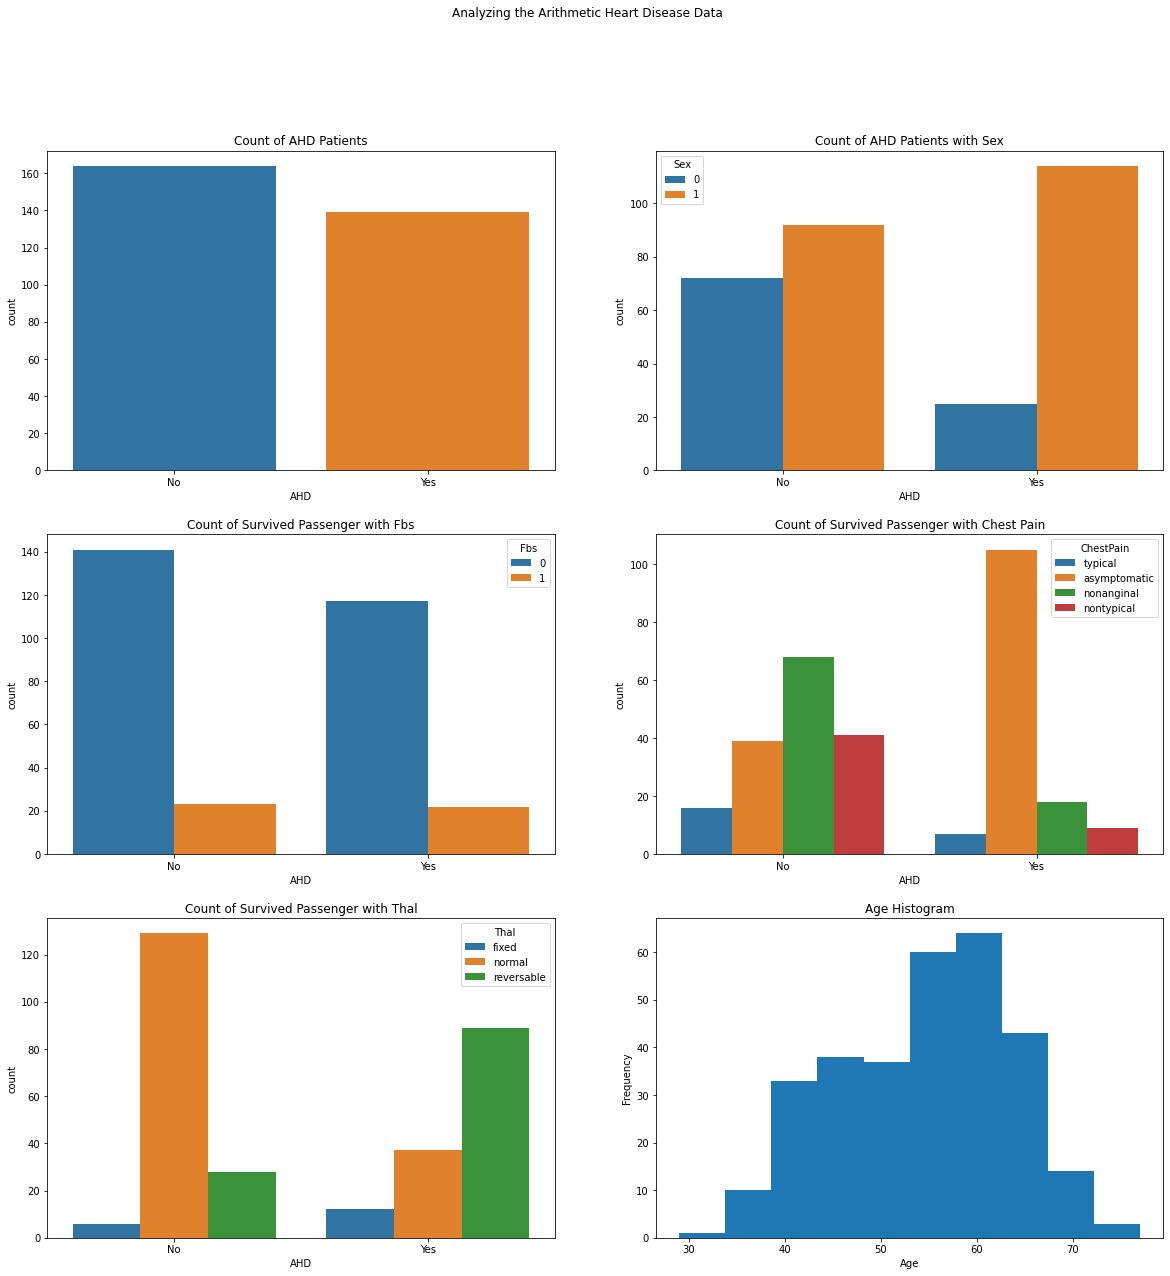

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

fig.suptitle('Analyzing the Arithmetic Heart Disease Data')

sns.countplot(ax=axes[0, 0], data=data, x='AHD')
axes[0,0].set_title('Count of AHD Patients')
sns.countplot(ax=axes[0, 1], data=data, x='AHD', hue='Sex')
axes[0,1].set_title('Count of AHD Patients with Sex')
sns.countplot(ax=axes[1, 0], data=data, x='AHD', hue='Fbs')
axes[1,0].set_title('Count of Survived Passenger with Fbs')
sns.countplot(ax=axes[1, 1], data=data, x='AHD', hue='ChestPain')
axes[1,1].set_title('Count of Survived Passenger with Chest Pain')
sns.countplot(ax=axes[2, 0], data=data, x='AHD', hue='Thal')
axes[2,0].set_title('Count of Survived Passenger with Thal')
data['Age'].plot.hist()
plt.xlabel('Age')
axes[2,1].set_title('Age Histogram')

In [6]:
data.groupby("AHD").mean()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,,
No,148.073171,52.585366,0.560976,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292
Yes,156.633094,56.625899,0.820144,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681


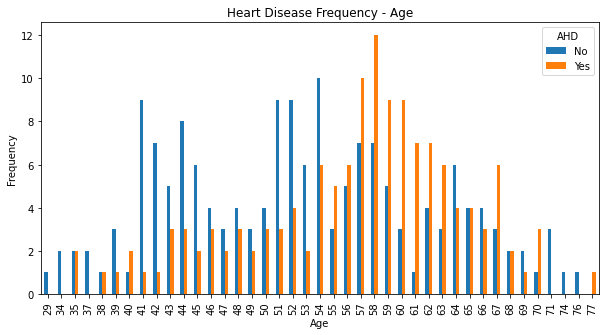

In [7]:
pd.crosstab(data.Age, data.AHD).plot(kind="bar", figsize=(10,5))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Heart Disease Frequency - Age")
plt.show()

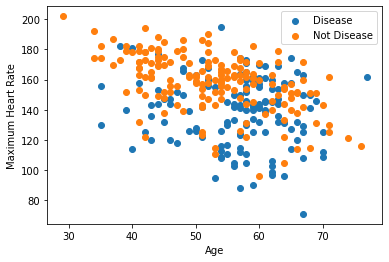

In [8]:
plt.scatter(x=data.Age[data.AHD=="Yes"], y=data.MaxHR[(data.AHD=="Yes")])
plt.scatter(x=data.Age[data.AHD=="No"], y=data.MaxHR[(data.AHD=="No")])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Data Wrangling

In [9]:
ahd = pd.get_dummies(data['AHD'], drop_first=True)
thal = pd.get_dummies(data['Thal'], drop_first=True)
chestpain = pd.get_dummies(data['ChestPain'], drop_first=True)

In [10]:
data = pd.concat([data, chestpain, thal, ahd], axis=1)
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Slope,Ca,Thal,AHD,nonanginal,nontypical,typical,normal,reversable,Yes
0,1,63,1,typical,145,233,1,2,150,0,...,3,0.0,fixed,No,0,0,1,0,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,2,3.0,normal,Yes,0,0,0,1,0,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,2,2.0,reversable,Yes,0,0,0,0,1,1
3,4,37,1,nonanginal,130,250,0,0,187,0,...,3,0.0,normal,No,1,0,0,1,0,0
4,5,41,0,nontypical,130,204,0,2,172,0,...,1,0.0,normal,No,0,1,0,1,0,0


In [11]:
data = data.drop(['Unnamed: 0', 'ChestPain', 'Thal', 'AHD'], axis=1)
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,nonanginal,nontypical,typical,normal,reversable,Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [12]:
data.dropna(inplace=True)
data.isnull().sum()

Age           0
Sex           0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
nonanginal    0
nontypical    0
typical       0
normal        0
reversable    0
Yes           0
dtype: int64

In [14]:
x = data.drop(['Yes'], axis=1)
y = data['Yes'] 

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [16]:
print(x_train.shape, x_test.shape, '\n' ,y_train.shape, y_test.shape)

(209, 16) (90, 16) 
 (209,) (90,)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score:  0.8555555555555555')

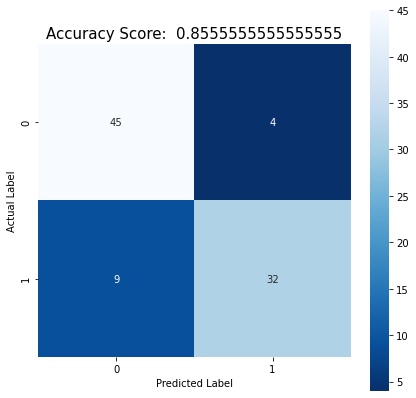

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score:  {0}".format(score)
plt.title(all_sample_title, size=15)

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score:  0.8111111111111111')

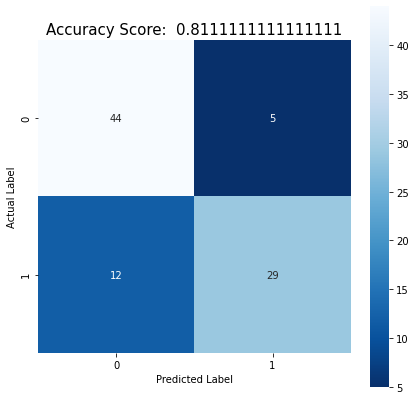

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score:  {0}".format(score)
plt.title(all_sample_title, size=15)

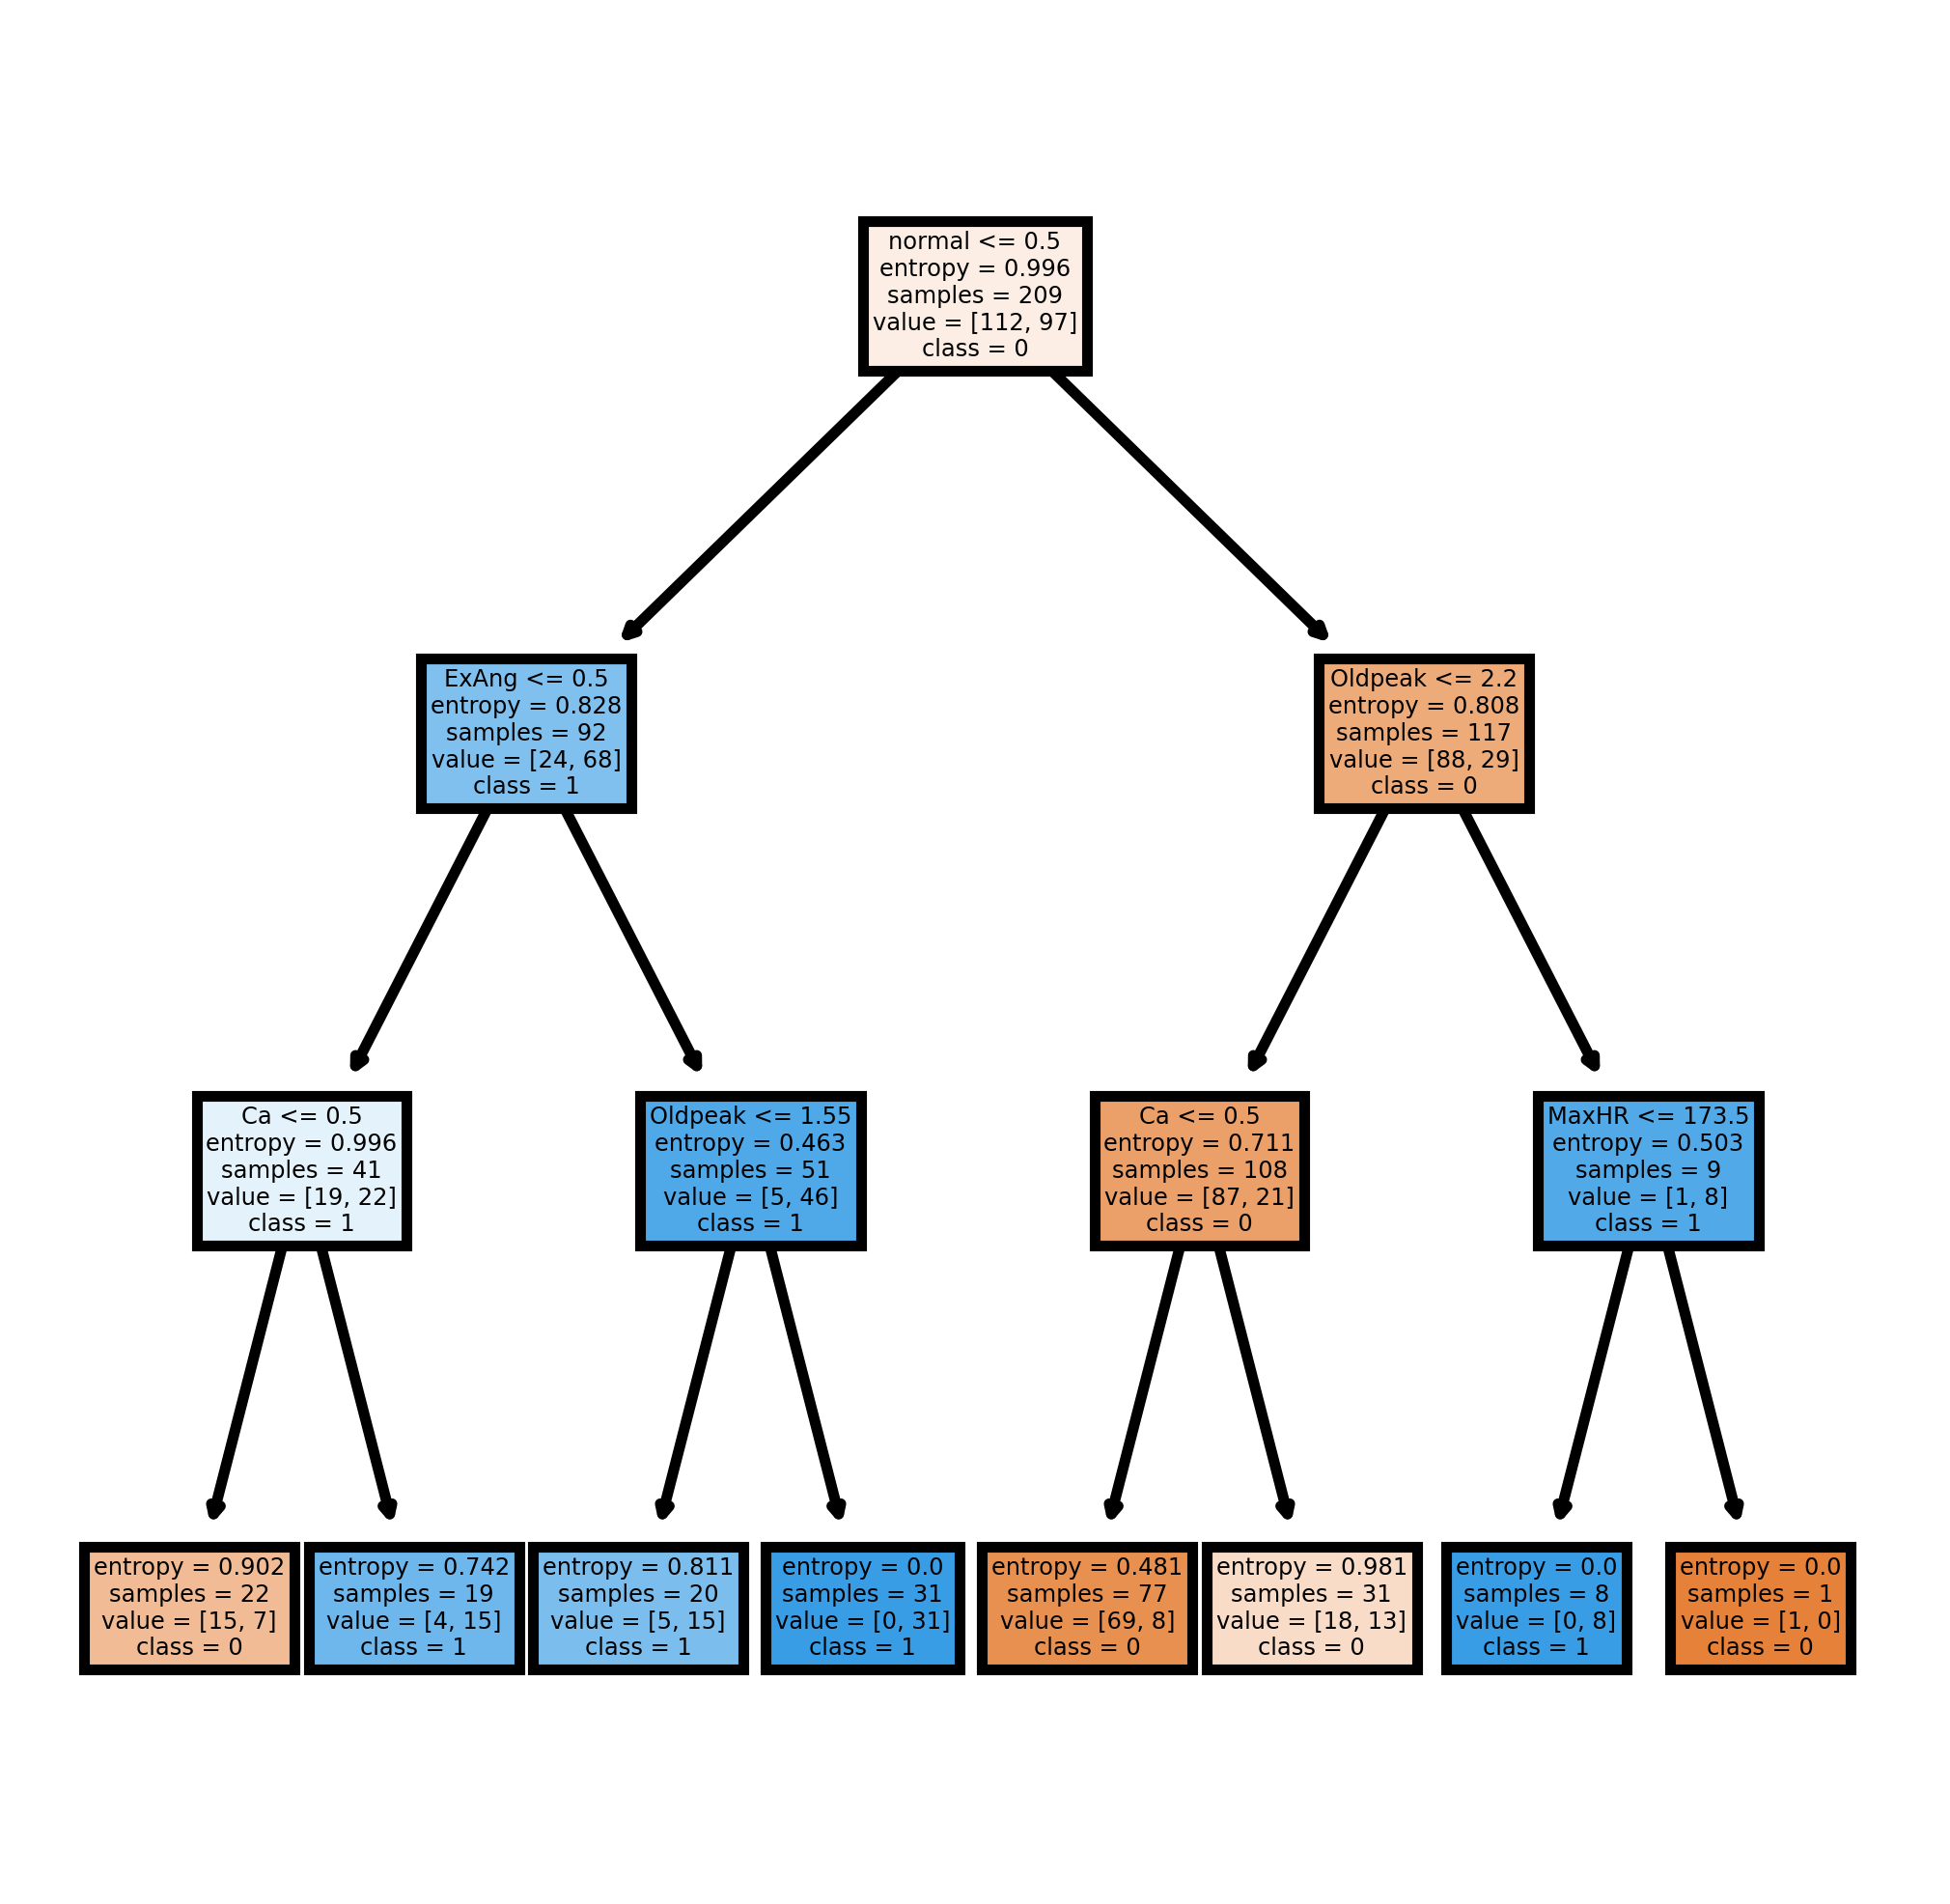

In [68]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=800)
plot_tree(model, filled = True, feature_names=x.columns, class_names=['0','1']);

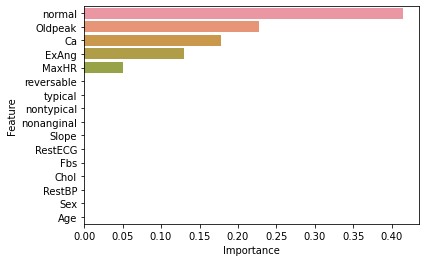

In [69]:
feature_names = x.columns
feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score:  0.8')

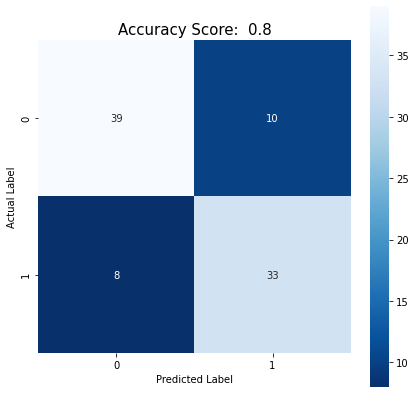

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = metrics.confusion_matrix(y_test, y_pred)
score = metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score:  {0}".format(score)
plt.title(all_sample_title, size=15)

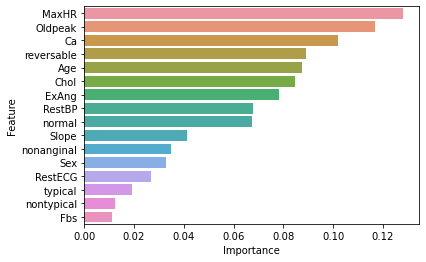

In [54]:
feature_names = x.columns
feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score:  0.7')

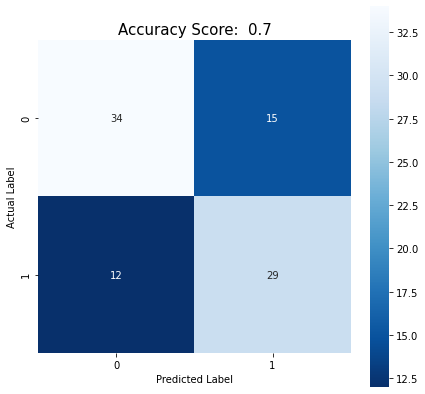

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = metrics.confusion_matrix(y_test, y_pred)
score = metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score:  {0}".format(score)
plt.title(all_sample_title, size=15)